In [ ]:
!ls ../videos/dfdc_train_part_48

In [107]:
import cv2
from matplotlib import pyplot as plt 

In [151]:
dfdc_train_part_48 = '../videos/dfdc_train_part_48'
onefile = 'oesmmyhzmi'


In [152]:
conf_threshold = 0.60

In [153]:
filename = dfdc_train_part_48 + '/' + onefile + '.mp4'

v_cap = cv2.VideoCapture(filename)
print('Frames:', int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT)))

imgs = []

for i in range(10):
    v_cap.set(1,10*i)
    ret, frame = v_cap.read() # Read the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    height, width, channels = frame.shape
    print(height, width, channels)
    imgs.append(frame)
    
v_cap.release()
print(len(imgs))

Frames: 300
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
1920 1080 3
10


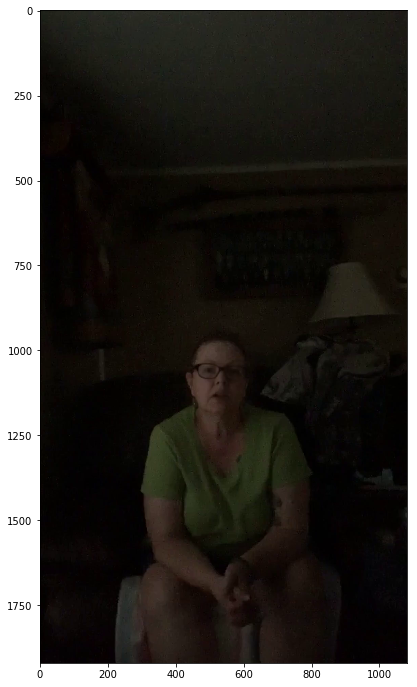

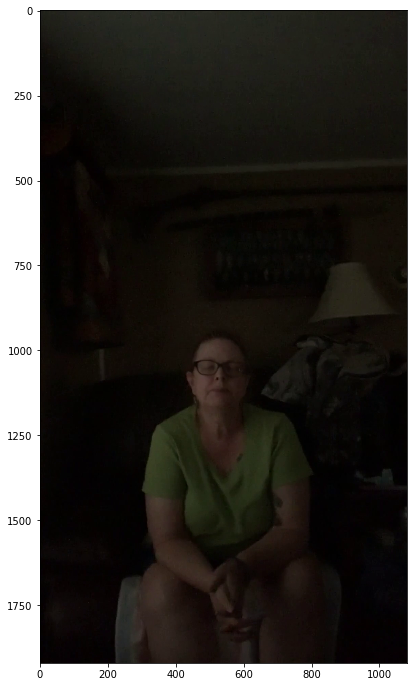

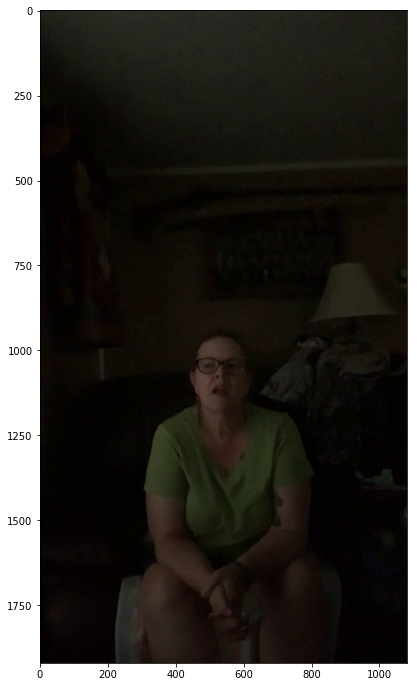

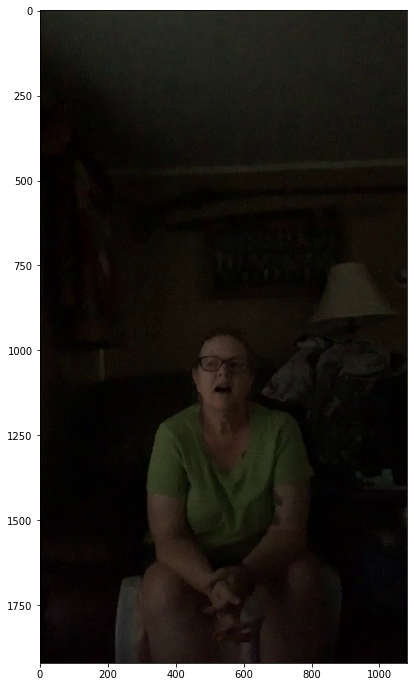

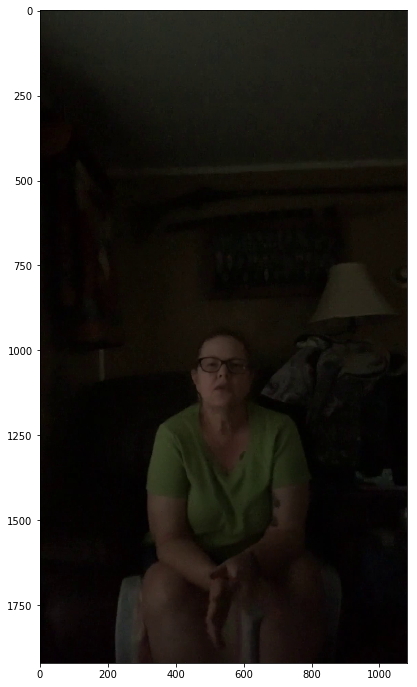

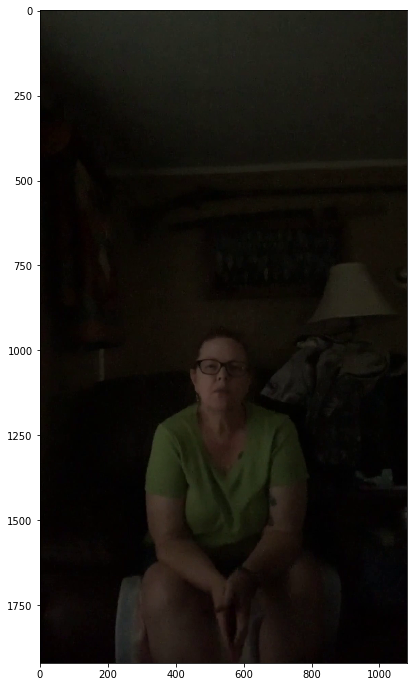

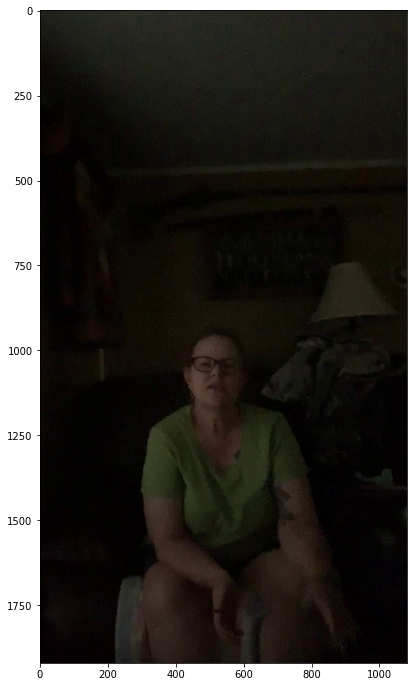

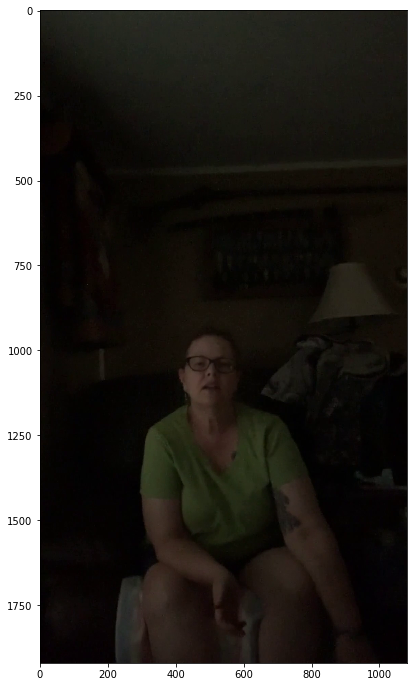

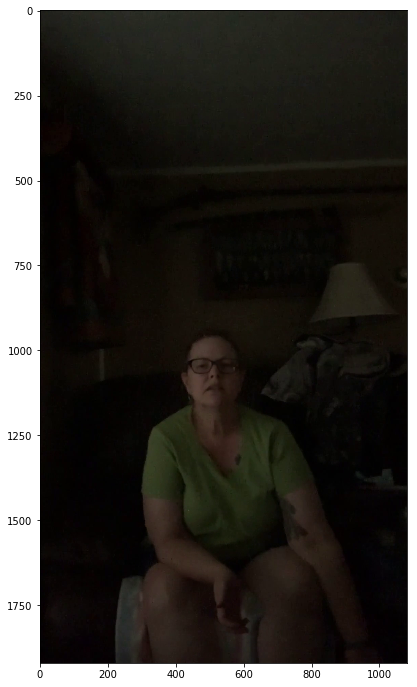

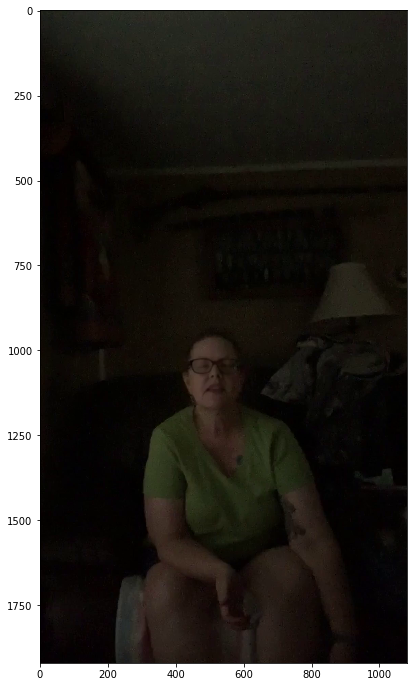

In [154]:
for img in imgs:
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    ax.imshow(img)


In [155]:
modelFile = "res10_300x300_ssd_iter_140000.caffemodel"

configFile = "deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)



confidence: 0.9801277
shape: 227 164
confidence: 0.8894393
shape: 220 169
confidence: 0.9949811
shape: 235 154
confidence: 0.9817479
shape: 263 172
confidence: 0.9934628
shape: 228 165
confidence: 0.9759005
shape: 226 156
confidence: 0.9825304
shape: 227 170
confidence: 0.9923354
shape: 220 160
confidence: 0.9902283
shape: 218 159
confidence: 0.9769935
shape: 228 165


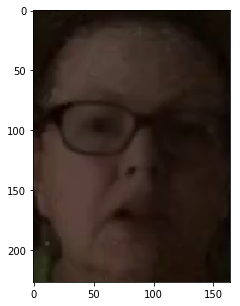

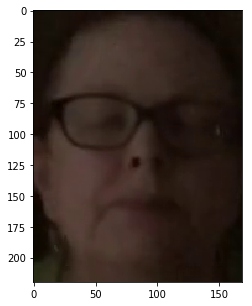

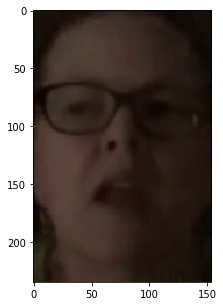

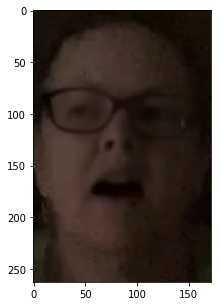

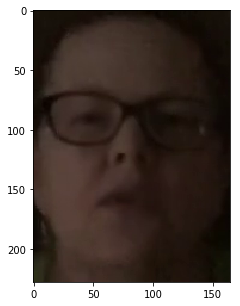

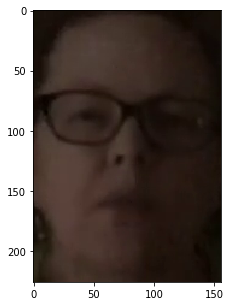

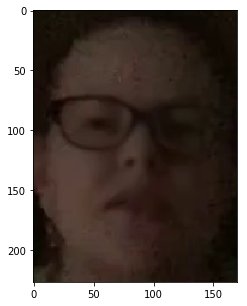

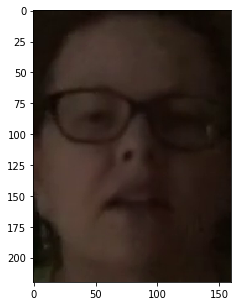

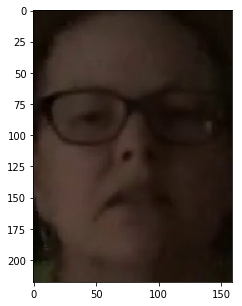

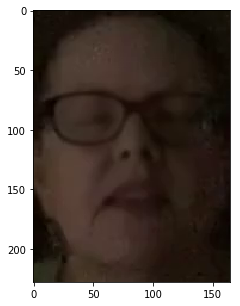

In [156]:
for img in imgs:
    (h, w) = img.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (103.93, 116.77, 123.68))
    
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            print("confidence:",confidence)
            x1 = int(detections[0, 0, i, 3] * w)
            y1 = int(detections[0, 0, i, 4] * h)
            x2 = int(detections[0, 0, i, 5] * w)
            y2 = int(detections[0, 0, i, 6] * h)
            crop = img[y1:y2, x1:x2] 
            print("shape:",y2-y1,x2-x1)

            fig, ax = plt.subplots(1,1, figsize=(5,5))
            ax.imshow(crop)


In [ ]:
v_cap = cv2.VideoCapture(filename)
out = cv2.VideoWriter('faces_' + onefile + '.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (115,170))
 
while(True):
    ret, img = v_cap.read()
        
    if ret == True: 
        (h, w) = img.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (103.93, 116.77, 123.68))
        
        net.setInput(blob)
        detections = net.forward()
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > conf_threshold:
                print("confidence:",confidence)
                x1 = int(detections[0, 0, i, 3] * w)
                y1 = int(detections[0, 0, i, 4] * h)
                x2 = int(detections[0, 0, i, 5] * w)
                y2 = int(detections[0, 0, i, 6] * h)
                crop = img[y1:y1+170, x1:x1+115] 
                out.write(crop)
        
    # Break the loop
    else:
        break 
 
# When everything done, release the video capture and video write objects
v_cap.release()
out.release()
 
# Closes all the frames
cv2.destroyAllWindows() 
